# Deep Learning Graduate Course Competition

**Importing Required Libraries and Functions**

In [1]:
# External Libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

# Internal Helper Libraries/Functions
from resnet import ResNet
from utils import combine_function, get_data_loaders

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**Initializing Our Model (implementation [here](resnet.py))**

In [2]:
num_blocks = [3,3,3]
model = ResNet(num_blocks=num_blocks,combine_function=combine_function).to(DEVICE)

**Number of Parameters in our Model**

In [3]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 366938


**Setting Up Data Loaders**

In [4]:
labels_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_loader, test_loader = get_data_loaders(dataset_path="data",train_percentage=0.9,batch_size=64)

**Training Parameters**

In [5]:
epochs = 10
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_function = torch.nn.NLLLoss()

**Training**

KeyboardInterrupt: 

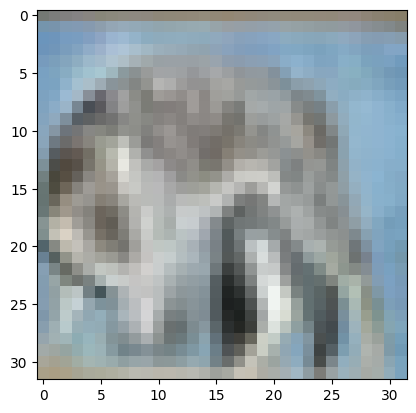

In [6]:
train_loss_history = []
train_accuracy_history = []
test_loss_history = []
test_accuracy_history = []

for epoch in range(epochs):

  train_loss = 0.0
  test_loss = 0.0
  train_accuracy = 0.0
  test_accuracy = 0.0
  train_count = 0
  test_count = 0
  model.train()

  for i, data in enumerate(train_loader):
    images, labels = data
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)
    optimizer.zero_grad()
    plt.imshow(np.transpose(images[0],[1,2,0]))
    predicted_output = model(images)
    fit = loss_function(predicted_output, labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
    _, predicted = torch.max(predicted_output, 1)
    train_accuracy += (predicted == labels).sum().item()
    train_count += len(predicted)

  model.eval()

  for i, data in enumerate(test_loader):
    with torch.no_grad():
      images, labels =data
      images = images.to(DEVICE)
      labels = labels.to(DEVICE)
      predicted_output = model(images)
      fit = loss_function(predicted_output, labels)
      test_loss += fit.item()
      _, predicted = torch.max(predicted_output, 1)
      test_accuracy += (predicted == labels).sum().item()
      test_count += len(predicted)

  train_loss = train_loss / len(train_loader)
  test_loss = test_loss / len(test_loader)
  train_accuracy = train_accuracy / train_count
  test_accuracy = test_accuracy / test_count
  train_loss_history += [train_loss]
  test_loss_history += [test_loss]
  train_accuracy_history += [train_accuracy]
  test_accuracy_history += [test_accuracy]

  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}, Train accuracy {train_accuracy}, Test accuracy {test_accuracy}')